# Generation of Relative Efficiency Plot

In [1]:
%matplotlib inline
import matplotlib

In [57]:
import numpy as np
matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt
from copy import deepcopy
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot

In [58]:
M_ibz_loess = 10**np.genfromtxt("../R_workspace/Muel_ibz_loess.csv",delimiter=",")[1:]
A_ibz_loess = 10**np.genfromtxt("../R_workspace/Aflow_ibz_loess.csv",delimiter=",")[1:]
F_ibz_loess = 10**np.genfromtxt("../R_workspace/Froyen_ibz_loess.csv",delimiter=",")[1:]
F_V_ibz_loess = 10**np.genfromtxt("../R_workspace/Froyen_VASP_ibz_loess.csv",delimiter=",")[1:]

In [59]:
def interpolate(p1,p2,y):
    """.
    
    Args:
        p1 (list): [x,y]
        p2 (list): [x,y]
        
    Returns:
        interpolated x value.
    """
    
    slope = (p2[1]-p1[1])/(p2[0]-p1[0])
    return p2[0]+(y-min(p2[1],p1[1]))/slope

In [60]:
def make_ratios(top,bottom):
    """Makes the ratio of the top vs the bottom methods 
    of grid generation in DFT in terms of the irreducible
    k-point density of top/irreducible k-point density of bottom
    at a given error value.
    
    top (list): the irreducible k-point densities and errors for 
        the top method.
        
    bottom (list): the irreducible k-point densities and errors for 
        the top method.
        
    Returns:
        numpy.array of the erros and ratios [error,ratio].
    """
    ratio = []
    count = 0
    for ti in top:
        t_dens = ti[0]
        t_err = ti[1]
        found = False
        for j in range(len(bottom)):
            bi = bottom[j]
            if bi[1] < t_err:
                found = True 
                b_dens = interpolate(bottom[j-1],bi,t_err)
                break 
        if found == True:
            ratio.append([t_err,t_dens/b_dens])
            
    return np.array(ratio)

In [61]:
A_M = make_ratios(A_ibz_loess,M_ibz_loess)
F_M = make_ratios(F_ibz_loess,M_ibz_loess)
F_V_M = make_ratios(F_V_ibz_loess,M_ibz_loess)

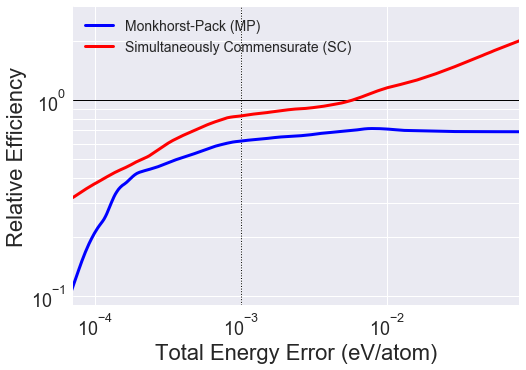

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.axhline(1,c="k",linewidth=1)
ax1.axvline(1E-3,ls='dotted',c='k',linewidth=1)
ax1.plot(A_M[:,0],1/A_M[:,1],label="Monkhorst-Pack (MP)",linewidth=3,c='b')
ax1.plot(F_M[:,0],1/F_M[:,1],label="Simultaneously Commensurate (SC)",linewidth=3,c='r')

ax1.set_yscale("log")
ax1.set_xlabel("Total Energy Error (eV/atom)",fontsize=22)
ax1.set_ylabel("Relative Efficiency",fontsize=22)
ax1.yaxis.grid(True,which="minor")
plt.yscale("log")
plt.loglog()

plt.xlim(7E-5,8E-2)
plt.ylim(9E-2,3E0)
plt.legend(fontsize=14)
for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

plt.savefig("../plots/Muller_vs_all.pdf",bbox_inches="tight")
plt.show()